# Importing Data and Libraries (and some feature cleaning)

In [ ]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, RobustScaler
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
mapping = {'Low': 0, 'High': 1}
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df_2 = pd.read_csv('/content/drive/MyDrive/Mini Project 1/data/test.csv')
df_1 = pd.read_csv('/content/drive/MyDrive/Mini Project 1/data/train.csv')
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

df_1 = df_1.replace(to_replace=['Low', 'High'], value=[0, 1])
df_1 = df_1.drop(['track_href', 'uri', 'type', 'analysis_url', 'id'], axis = 1)
df_2 = df_2.drop(['track_href', 'uri', 'type', 'analysis_url', 'ID'], axis = 1)

df_1['track_album_release_date'] = pd.to_datetime(df_1['track_album_release_date'], format= 'mixed')
df_2['track_album_release_date'] = pd.to_datetime(df_2['track_album_release_date'], format= 'mixed')


cols = df_1.columns[df_1.columns != 'Popularity_Type']
for col in cols:
  #mean_val = df_1[col].mean()
  df_1[col] = df_1[col].fillna(0) #imputation

k = df_1['track_album_release_date'].min()
df_1['track_album_release_date'] = (df_1['track_album_release_date'] - k).dt.days
df_2['track_album_release_date'] = (df_2['track_album_release_date'] - k).dt.days
df_1 = df_1[(np.abs(stats.zscore(df_1)) < 8).all(axis=1)]
df_x = pd.DataFrame(df_1, columns=['time_signature', 'speechiness','danceability','duration_ms','energy', 'mode', 'track_album_release_date', 'instrumentalness','valence','key','tempo','loudness','acousticness','liveness'])

#majority_class = df_1[df_1['Popularity_Type'] == 0]
#minority_class = df_1[df_1['Popularity_Type'] == 1]
#undersampled_majority = majority_class.sample(n=len(minority_class), random_state=101)
#df_1 = pd.concat([minority_class, undersampled_majority], axis=0)

X = pd.DataFrame(df_1, columns=['time_signature', 'speechiness','danceability','duration_ms','energy', 'mode', 'track_album_release_date', 'instrumentalness','valence','key','tempo','loudness','acousticness','liveness'])
y = df_1['Popularity_Type']




<ipython-input-1-404a7834189a>:29: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_1 = df_1.replace(to_replace=['Low', 'High'], value=[0, 1])


In [ ]:
df_x[['time_signature', 'speechiness','danceability','duration_ms','energy', 'mode', 'track_album_release_date', 'instrumentalness','valence','key','tempo','loudness','acousticness','liveness']].mean()

,0
time_signature,3.941604
speechiness,0.100639
danceability,0.623930
duration_ms,204875.385674
energy,0.586212
mode,0.566052
track_album_release_date,23100.384895
instrumentalness,0.200613
valence,0.482280
key,5.197508


In [ ]:
df_2[['time_signature', 'speechiness','danceability','duration_ms','energy', 'mode', 'track_album_release_date', 'instrumentalness','valence','key','tempo','loudness','acousticness','liveness']].mean()

,0
time_signature,3.919338
speechiness,0.105505
danceability,0.618033
duration_ms,203851.055843
energy,0.589688
mode,0.546019
track_album_release_date,23145.797311
instrumentalness,0.202419
valence,0.482240
key,5.365047


In [ ]:
numeric_features = ['speechiness','danceability','duration_ms','energy', 'track_album_release_date'
                      ,'instrumentalness','valence',
                      'tempo','loudness','acousticness','liveness', 'key']
X_numeric = pd.DataFrame(df_x, columns = numeric_features)
df_2x = pd.DataFrame(df_2, columns=numeric_features)

One Hot Encoding Categorical Features

In [ ]:
encoded_X = pd.get_dummies(X, columns=['time_signature', 'mode'])
encoded_df2 = pd.get_dummies(df_2, columns=['time_signature', 'mode'])

In [ ]:
#poly = PolynomialFeatures(degree = 1,
                         #interaction_only = False,
                         #include_bias = False)
#X_new = poly.fit_transform(X_numeric)
#collist = poly.get_feature_names_out(numeric_features)
#X_poly = pd.DataFrame(X_new, columns = collist)

#df_2xx = pd.DataFrame(poly.fit_transform(df_2x), columns = collist)


Checking skew in the features

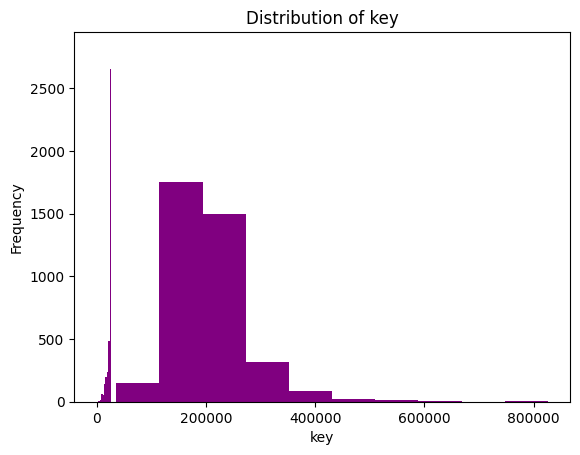

In [ ]:

for col in numeric_features:
  df_1[col].hist(color='purple', grid=False)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title('Distribution of ' + col)
  plt.show()



In [ ]:
cols = numeric_features
scaler = RobustScaler()
encoded_X[cols] = scaler.fit_transform(encoded_X[cols])
encoded_df2[cols] = scaler.fit_transform(encoded_df2[cols])
'''
for col in cols:
  df_1[col].hist(color='blue', grid=False)
  plt.xlabel(col)
  plt.ylabel('Frequency')
  plt.title('Distribution of ' + col)
  plt.show()
'''

"\nfor col in cols:\n  df_1[col].hist(color='blue', grid=False)\n  plt.xlabel(col)\n  plt.ylabel('Frequency')\n  plt.title('Distribution of ' + col)\n  plt.show()\n"

In [ ]:
corr_df = X
corr_df['Song_Popularity'] = y

Checking out correlation and redundancy in the data

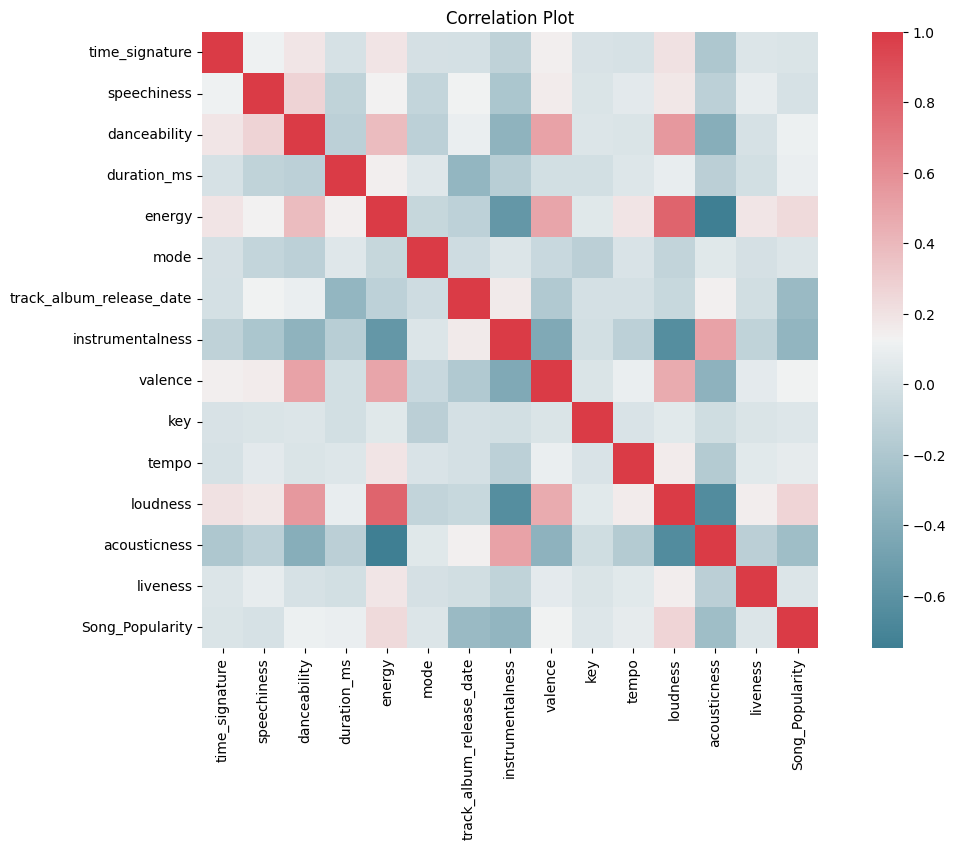

In [ ]:
 #New dataframe to calculate correlation between numeric features
cor= corr_df.corr(method='pearson')
fig, ax =plt.subplots(figsize=(14, 8))
plt.title("Correlation Plot")
sns.heatmap(cor, mask=np.zeros_like(cor), cmap=sns.diverging_palette(220, 10, as_cmap=True),
            square=True, ax=ax)
plt.show()

In [ ]:
cor.sort_values(by='Song_Popularity', key=abs).columns

Index(['time_signature', 'speechiness', 'danceability', 'duration_ms',
       'energy', 'mode', 'track_album_release_date', 'instrumentalness',
       'valence', 'key', 'tempo', 'loudness', 'acousticness', 'liveness',
       'Song_Popularity'],
      dtype='object')

In [ ]:
#cor['Song_Popularity'].sort_values()[:20]
collist= encoded_X.columns.tolist()
print(collist)

['speechiness', 'danceability', 'duration_ms', 'energy', 'track_album_release_date', 'instrumentalness', 'valence', 'key', 'tempo', 'loudness', 'acousticness', 'liveness', 'time_signature_1.0', 'time_signature_3.0', 'time_signature_4.0', 'time_signature_5.0', 'mode_0.0', 'mode_1.0']


In [ ]:
print(encoded_X.head())

   speechiness  danceability  duration_ms  energy  track_album_release_date  \
0       0.2040         0.882     140733.0   0.764                     25710   
1       0.1590         0.779     246960.0   0.640                     18868   
2       0.2230         0.770     189707.0   0.597                     25739   
3       0.3210         0.573     172296.0   0.693                     25879   
4       0.0315         0.714     274488.0   0.720                     24464   

   instrumentalness  valence   key    tempo  loudness  acousticness  liveness  \
0          0.000000    0.886  11.0  140.113    -5.241      0.359000    0.1190   
1          0.000766    0.499   7.0   99.017    -8.415      0.000155    0.1010   
2          0.000000    0.875   1.0  170.022    -4.901      0.530000    0.2390   
3          0.004240    0.837   6.0  150.850    -6.220      0.609000    0.1960   
4          0.000000    0.696   6.0  113.015    -6.751      0.092200    0.0742   

   time_signature_1.0  time_signature_

In [ ]:
selected_features = collist
X_gen = encoded_X
df_2xgen = encoded_df2

In [ ]:
X_gen['time_signature_1.0'] = False

In [ ]:
columns = X_gen.columns.tolist()

In [ ]:
print(columns.index('time_signature_3.0'))
updated = ['time_signature_1.0', 'time_signature_3.0', 'time_signature_4.0', 'time_signature_5.0', 'mode_0.0', 'mode_1.0']
for index in range(12, len(columns)):
  columns[index] = updated[index-12]

13


In [ ]:
X_gen = X_gen[columns]

In [ ]:
print(X_gen.head())

   speechiness  danceability  duration_ms  energy  track_album_release_date  \
0       0.2040         0.882     140733.0   0.764                     25710   
1       0.1590         0.779     246960.0   0.640                     18868   
2       0.2230         0.770     189707.0   0.597                     25739   
3       0.3210         0.573     172296.0   0.693                     25879   
4       0.0315         0.714     274488.0   0.720                     24464   

   instrumentalness  valence   key    tempo  loudness  acousticness  liveness  \
0          0.000000    0.886  11.0  140.113    -5.241      0.359000    0.1190   
1          0.000766    0.499   7.0   99.017    -8.415      0.000155    0.1010   
2          0.000000    0.875   1.0  170.022    -4.901      0.530000    0.2390   
3          0.004240    0.837   6.0  150.850    -6.220      0.609000    0.1960   
4          0.000000    0.696   6.0  113.015    -6.751      0.092200    0.0742   

   time_signature_1.0  time_signature_

In [ ]:
print(X_gen.shape)

(3853, 18)


In [ ]:
print(df_2xgen.shape)
print(df_2xgen.head())

(967, 18)
   speechiness  danceability  duration_ms  energy  track_album_release_date  \
0       0.2580         0.584     180638.0   0.747                     25556   
1       0.0422         0.816     158978.0   0.532                     25774   
2       0.1150         0.849     139041.0   0.584                     24962   
3       0.3660         0.584     253533.0   0.706                     15159   
4       0.0281         0.429     266773.0   0.661                     16992   

   instrumentalness  valence   key    tempo  loudness  acousticness  liveness  \
0          0.001300    0.798  10.0   98.111    -4.726       0.10500     0.149   
1          0.000000    0.258   4.0  136.882    -5.634       0.21800     0.250   
2          0.000006    0.724   1.0  115.018    -8.195       0.09290     0.492   
3          0.000000    0.579  10.0  174.039    -7.899       0.20900     0.125   
4          0.000121    0.285  11.0  173.372    -7.227       0.00239     0.234   

   time_signature_1.0  time_

In [ ]:
#considered_features = ['time_signature', 'speechiness','danceability','duration_ms','energy', 'mode', 'instrumentalness','valence','key','tempo','loudness','acousticness','liveness']
#df_x = pd.DataFrame(df_1, columns=considered_features)
#X = df_x

In [ ]:
#considered_features = ['time_signature', 'speechiness','danceability','duration_ms','energy', 'mode', 'instrumentalness','valence','key','tempo','loudness','acousticness','liveness']
#df_2x = pd.DataFrame(df_2, columns=considered_features)
#print(df_2x.head())


In [ ]:
categorical_features = ['time_signature', 'mode', 'key']
X_categ = pd.DataFrame(df_x, columns=categorical_features)
df_2xcateg = pd.DataFrame(df_2, columns=categorical_features)

X_categ= X_categ.astype(int)
df_2xcateg= df_2xcateg.astype(int)

#X_polytope = pd.concat([X_gen, X_categ], axis=1)
X_gen.reset_index(drop=True, inplace=True)
X_categ.reset_index(drop=True, inplace=True)
X_polytope = pd.merge(X_gen, X_categ, left_index=True, right_index=True)

df_2xgen.reset_index(drop=True, inplace=True)
df_2xcateg.reset_index(drop=True, inplace=True)
df_2xpolytope = pd.merge(df_2xgen, df_2xcateg, left_index=True, right_index=True)

categorical_features = ['time_signature', 'mode', 'key']
df_2xpolytope[categorical_features] = df_2xpolytope[categorical_features].astype(int)

# Model training and tuning

Hyperparameter tuning a Random Forest

In [ ]:
from sklearn.model_selection import cross_validate
hyperparameter_score_list = []
for n in [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]:
  for d in [1, 7, 15, 20]:
    for s in [2, 4, 8]:
      rf = RandomForestClassifier(max_features = None, criterion = 'log_loss', n_estimators=n, min_samples_split = s, max_depth = d)
      scores = cross_validate(rf, X_gen, y, cv=5, scoring="roc_auc")
      mean_score = np.mean(scores['test_score'])
      hyperparameter_score_list.append([n, d, s, mean_score])

KeyboardInterrupt: 

In [ ]:
from prettytable import PrettyTable
myTable = PrettyTable(["n_estimators", "max_depth", "min_split", "accuracy"])
for row in hyperparameter_score_list:
    myTable.add_row([row[0], row[1], row[2], round(row[3], 3)])
print(myTable)

+--------------+-----------+-----------+----------+
| n_estimators | max_depth | min_split | accuracy |
+--------------+-----------+-----------+----------+
|     100      |     1     |     2     |  0.651   |
|     100      |     1     |     4     |  0.653   |
|     100      |     1     |     8     |  0.654   |
|     100      |     7     |     2     |  0.824   |
|     100      |     7     |     4     |  0.824   |
|     100      |     7     |     8     |  0.822   |
|     100      |     15    |     2     |  0.834   |
|     100      |     15    |     4     |  0.837   |
|     100      |     15    |     8     |  0.837   |
|     100      |     20    |     2     |  0.836   |
|     100      |     20    |     4     |  0.838   |
|     100      |     20    |     8     |  0.836   |
|     200      |     1     |     2     |  0.654   |
|     200      |     1     |     4     |  0.652   |
|     200      |     1     |     8     |  0.653   |
|     200      |     7     |     2     |  0.824   |
|     200   

In [ ]:
rf = RandomForestClassifier(n_estimators=300, min_samples_split=4, max_features='sqrt', max_depth=15)

In [ ]:
from catboost import CatBoostClassifier

In [ ]:
import catboost
from catboost.utils import eval_metric

numeric_features = ['speechiness','danceability','duration_ms','energy', 'track_album_release_date'
                      ,'instrumentalness','valence',
                      'tempo','loudness','acousticness','liveness']
X_inttrain, X_intest, y_intrain, y_intest = train_test_split(X_gen, y, test_size=0.15, random_state=42, stratify=y)
X_train, X_val, y_train, y_val = train_test_split(X_inttrain, y_intrain, test_size=0.15, random_state=42, stratify=y_intrain)
cat_train_pool = catboost.Pool(X_train, y_train)
cat_val_pool = catboost.Pool(X_val, y_val)
cat_test_pool = catboost.Pool(X_intest, y_intest)


def calc_test_quality(train_pool=cat_train_pool, val_pool=cat_val_pool, test_pool=cat_test_pool, **kwargs):
    model = catboost.CatBoostClassifier(**kwargs, random_seed=42)
    model.fit(train_pool, verbose=0, eval_set=val_pool)
    y_pred = model.predict_proba(test_pool)
    return eval_metric(test_pool.get_label(), y_pred[:, 1], 'AUC')

calc_test_quality()

[0.8448342251669698]

Hyperparameter tuning a CatBoost model

In [ ]:
import optuna
from optuna.samplers import TPESampler
from catboost.utils import eval_metric

def objective(trial):
    params = {
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 3, 10),
        'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1, 10),
        'boosting_type': trial.suggest_categorical('boosting_type', ['Ordered', 'Plain']),
        'max_ctr_complexity': trial.suggest_int('max_ctr_complexity', 0, 8)
    }

    model = catboost.CatBoostClassifier(**params, random_seed=42)
    model.fit(cat_train_pool, verbose=0, eval_set=cat_val_pool)
    y_pred = model.predict_proba(cat_val_pool)
    return eval_metric(cat_val_pool.get_label(), y_pred[:, 1], 'AUC')

sampler = TPESampler(seed=123)
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=20)

[I 2025-02-13 02:37:06,750] A new study created in memory with name: no-name-b674733f-832f-476c-802d-6e29c624d4c4
[I 2025-02-13 02:37:10,516] Trial 0 finished with value: 0.8426002385539958 and parameters: {'learning_rate': 0.07268222670380756, 'depth': 5, 'l2_leaf_reg': 3.041663082077828, 'boosting_type': 'Plain', 'max_ctr_complexity': 3}. Best is trial 0 with value: 0.8426002385539958.
[I 2025-02-13 02:38:06,566] Trial 1 finished with value: 0.8413524176529956 and parameters: {'learning_rate': 0.0982687778546154, 'depth': 8, 'l2_leaf_reg': 5.328387113359248, 'boosting_type': 'Ordered', 'max_ctr_complexity': 6}. Best is trial 0 with value: 0.8426002385539958.
[I 2025-02-13 02:38:14,576] Trial 2 finished with value: 0.8331314799522892 and parameters: {'learning_rate': 0.0494715020211662, 'depth': 3, 'l2_leaf_reg': 4.582398297973883, 'boosting_type': 'Ordered', 'max_ctr_complexity': 1}. Best is trial 0 with value: 0.8426002385539958.
[I 2025-02-13 02:38:47,182] Trial 3 finished with val

In [ ]:
calc_test_quality(**study.best_params), study.best_params

([0.8428823709054214],
 {'learning_rate': 0.010115191390087706,
  'depth': 6,
  'l2_leaf_reg': 6.266989276591908,
  'boosting_type': 'Plain',
  'max_ctr_complexity': 7})

In [ ]:
ct= CatBoostClassifier(learning_rate=0.010115191390087706, depth= 6, l2_leaf_reg=6.266989276591908,
                       boosting_type='Plain',max_ctr_complexity= 7, verbose=0)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_gen, y, train_size=0.7, stratify=y)

Hyperparameter tuning an XGBoost model

In [ ]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials
from hyperopt.pyll import scope
import sklearn.metrics

# Define the hyperparameter space
space = {
    'max_depth': scope.int(hp.quniform('max_depth', 2, 16, 1)),
    'learning_rate': hp.loguniform('learning_rate', -7, -2),
    'subsample': hp.uniform('subsample', 0.5, 1),
    'n_estimators': scope.int(hp.uniform('n_estimators', 50, 500))
}

# Define the objective function to minimize
def objective(params):
    xgb_model = xgb.XGBClassifier(**params, enable_categorical = True)
    xgb_model.fit(X_train, y_train)
    y_pred = xgb_model.predict_proba(X_test)
    expected = [e[-1] for e in y_pred]
    score = sklearn.metrics.roc_auc_score(y_test, expected)
    return {'loss': -score, 'status': STATUS_OK}

# Perform the optimization
best_params = fmin(objective, space, algo=tpe.suggest, max_evals=300)
print("Best set of hyperparameters: ", best_params)

100%|██████████| 300/300 [11:58<00:00,  2.40s/trial, best loss: -0.8363880523590143]
Best set of hyperparameters:  {'learning_rate': 0.017542724911038882, 'max_depth': 15.0, 'n_estimators': 445.54375123756455, 'subsample': 0.6411760492565678}


In [ ]:
xg = xgb.XGBClassifier(learning_rate=0.0175, max_depth= int(15.0),
                       n_estimators=500, subsample=0.65)

from sklearn.model_selection import cross_val_score
#accuracies = cross_val_score(estimator = xg, X = X_train, y = y_train, cv = 10, scoring='roc_auc')


In [ ]:
import sklearn.metrics
import xgboost as xgb


def evaluate_model(model, X_train, X_test, y_train, y_test, stack=False):
  if stack:
    expected = [l[-1] for l in model.predict_proba(X_test)]
    #print('----------------------------------------------\n')
    #print('ROC-AUC Score: ', round(sklearn.metrics.roc_auc_score(y_test, expected), 3))
    return round(sklearn.metrics.roc_auc_score(y_test, expected), 3)
  else:
    model.fit(X_train, y_train)
    expected = [l[-1] for l in model.predict_proba(X_test)]
    #print('----------------------------------------------\n')
    #print('ROC-AUC Score: ', round(sklearn.metrics.roc_auc_score(y_test, expected), 3))
    return round(sklearn.metrics.roc_auc_score(y_test, expected), 3)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_gen, y, train_size=0.7, stratify=y)

In [ ]:
evaluate_model(ct, X_train, X_test, y_train, y_test)

0.822

In [ ]:
rf = RandomForestClassifier(criterion='log_loss', n_estimators=300, min_samples_split=4 , max_depth=15, max_features=None)

In [ ]:
evaluate_model(rf, X_train, X_test, y_train, y_test)

0.828

In [ ]:
evaluate_model(xg, X_train, X_test, y_train, y_test)

0.827

In [ ]:
from sklearn.ensemble import StackingClassifier, VotingClassifier

Adding a majority vote based stacking classifier and testing individual and stack performance

In [ ]:
acu_ct = []
acu_rf = []
acu_xg = []
acu_st = []
for epoch in range(10):
  X_train, X_test, y_train, y_test = train_test_split(X_gen, y, train_size=0.7, stratify=y)
  print('Epoch num: ' + str(epoch))
  ctac = evaluate_model(ct,  X_train, X_test, y_train, y_test)
  print('ROC-AUC of CatBoost: ' + str(ctac))
  rfac = evaluate_model(rf, X_train, X_test, y_train, y_test)
  print('ROC-AUC of Random Forest: ' + str(rfac))
  xgac = evaluate_model(xg, X_train, X_test, y_train, y_test)
  print('ROC-AUC of XGBoost: ' + str(xgac))
  estimators = [
    ('ct', ct),
    ('rf', rf),
    ('xg', xg),
  ]
  stacked = VotingClassifier(estimators=estimators, voting='soft')
  stacked.fit(X_train, y_train)
  stac = evaluate_model(stacked, X_train, X_test, y_train, y_test, stack=True)
  print('ROC-AUC of Stacked: ' + str(stac))
  acu_ct.append(ctac)
  acu_rf.append(rfac)
  acu_xg.append(xgac)
  acu_st.append(stac)
  print()

print('Average CT ROC-AUC: ', sum(acu_ct)/len(acu_rf))
print('Average RF ROC-AUC: ', sum(acu_rf)/len(acu_rf))
print('Average XG ROC-AUC: ', sum(acu_xg)/len(acu_rf))
print('Average Stack ROC-AUC: ', sum(acu_st)/len(acu_rf))

Epoch num: 0
ROC-AUC of CatBoost: 0.839
ROC-AUC of Random Forest: 0.844
ROC-AUC of XGBoost: 0.844
ROC-AUC of Stacked: 0.848

Epoch num: 1
ROC-AUC of CatBoost: 0.834
ROC-AUC of Random Forest: 0.839
ROC-AUC of XGBoost: 0.841
ROC-AUC of Stacked: 0.846

Epoch num: 2
ROC-AUC of CatBoost: 0.83
ROC-AUC of Random Forest: 0.836
ROC-AUC of XGBoost: 0.843
ROC-AUC of Stacked: 0.845

Epoch num: 3
ROC-AUC of CatBoost: 0.833
ROC-AUC of Random Forest: 0.828
ROC-AUC of XGBoost: 0.83
ROC-AUC of Stacked: 0.836

Epoch num: 4
ROC-AUC of CatBoost: 0.824
ROC-AUC of Random Forest: 0.827
ROC-AUC of XGBoost: 0.829
ROC-AUC of Stacked: 0.831

Epoch num: 5
ROC-AUC of CatBoost: 0.835
ROC-AUC of Random Forest: 0.847
ROC-AUC of XGBoost: 0.846
ROC-AUC of Stacked: 0.849

Epoch num: 6
ROC-AUC of CatBoost: 0.835
ROC-AUC of Random Forest: 0.832
ROC-AUC of XGBoost: 0.838
ROC-AUC of Stacked: 0.841

Epoch num: 7
ROC-AUC of CatBoost: 0.825
ROC-AUC of Random Forest: 0.834
ROC-AUC of XGBoost: 0.832
ROC-AUC of Stacked: 0.837

Ep

In [ ]:
estimators = [
    ('ct', ct),
    ('rf', rf),
    ('xg', xg),
]
stacked = VotingClassifier(estimators=estimators, voting='soft')
stacked.fit(X_gen, y)
y_test_pred = [l[1] for l in stacked.predict_proba(df_2xgen)]


Creating file for Kaggle submission

In [ ]:

import csv

data = [
    ['ID', 'Popularity_Type']
]
for i in range(len(y_test_pred)):
  data.append([i+1, y_test_pred[i]])

file_path = 'predictions.csv'

with open(file_path, 'w', newline='') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerows(data)